# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

W mieście liczącym 700 000 mieszkańców pojawiła się choroba, na którą choruje 1 osoba na 1000. Nie wiadomo, które osoby są chore, ale dostępny jest test diagnostyczny, którego zarówno czułość i swoistość wynosi 99% (tzn. prawdopodobieństwo uzyskania poprawnego wyniku – zarówno pozytywnego u osoby chorej, jak i negatywnego u osoby zdrowej – wynosi 99%).
Jakie jest prawdopodobieństwo, że pacjent, który otrzymał pozytywny wynik testu jest rzeczywiście chory?

#### A)

Przeprowadź symulację komputerową opisanego scenariusza:

- Utwórz listę mieszkańców o wielkości 700 tys. elementów, gdzie każdy element reprezentuje mieszkańca. Każdy mieszkaniec powinien posiadać dwie właściwości: *stan zdrowia* (zdrowy/chory) oraz *wynik diagnozy* (pozytywny/negatywny).
- Losowo wybieramy 700 mieszkańców (bo 1 na 1000 osób choruje) i przypisz im *stan zdrowia* jako *chory*. Uwaga: należy dopilnować, aby nie wylosowała się dwukrotnie ta sama osoba.
- Spośród osób chorych wylosuj 1% i przypisz im błędny wynik testu (*wynik diagnozy* = negatywny). Spośród osób zdrowych wylosuj 1% i przypisz im błędny wynik testu (*wynik diagnozy* = pozytywny).
- Korzystając z utworzonej listy mieszkańców, oblicz prawdopodobieństwo, że osoba z pozytywnym wynikiem testu jest rzeczywiście chora, według wzoru: `liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`.

In [50]:
import random
import time
# 0 - zdrowy, 1 - chory
start = time.time()
population_size = 700_000
citizens = [{'stan_zdrowia': 0, 'wynik_diagnozy': 0} for _ in range(population_size)] # wszyscy zdrowi

sick_indexes = random.sample(range(population_size), int(population_size * 0.001))
for i in sick_indexes:
    citizens[i]['stan_zdrowia'] = 1
    citizens[i]['wynik_diagnozy'] = 1 

false_sickness = random.sample(sick_indexes, int(0.01 * len(sick_indexes)))
for i in false_sickness:
    citizens[i]['wynik_diagnozy'] = 0

healthy_citizens = [i for i in range(population_size) if citizens[i]['stan_zdrowia'] == 0 and citizens[i]['wynik_diagnozy'] == 0]
false_healthiness = random.sample(healthy_citizens, int(0.01 * len(healthy_citizens)))
for i in false_healthiness:
    citizens[i]['wynik_diagnozy'] = 1

print(citizens.count({'stan_zdrowia': 0, 'wynik_diagnozy': 1}), "zdrowych chorych")
print(citizens.count({'stan_zdrowia': 1, 'wynik_diagnozy': 0}), "chorych zdrowych")

positive_cases = [p for p in citizens if p['stan_zdrowia'] == 1 and p['wynik_diagnozy'] == 1]
sick_positive = [p for p in citizens if p['wynik_diagnozy'] == 1]

print(len(positive_cases), "chore osoby z pozytywnym testem")
print(len(sick_positive), "wszystkie osoby z pozytywnym testem")

probability = len(positive_cases) / len(sick_positive)
end = time.time()
print(f"Prawdopodobieństwo, że osoba z pozytywnym testem jest chora: {probability*100:.2f}%")
print(f"Czas wykonania: {end - start:.2f} sekund")



6993 zdrowych chorych
7 chorych zdrowych
693 chore osoby z pozytywnym testem
7686 wszystkie osoby z pozytywnym testem
Prawdopodobieństwo, że osoba z pozytywnym testem jest chora: 9.02%
Czas wykonania: 0.36 sekund


#### B)

Napisz funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Następnie zmierz i porównaj czas wykonania obliczeń w obu przypadkach: symulacji komputerowej oraz wzoru Bayesa.




In [53]:
import time

def bayesian_probability(p_A, p_B, p_B_A):
    return (p_B_A * p_A) / p_B
# P(A) - prawdopodobieństwo, że osoba jest chora
sick_people = len([p for p in citizens if p['stan_zdrowia'] == 1])
p_A = sick_people / population_size
print(f"p_A: {p_A} (prawdopodobieństwo, że osoba jest chora z całej populacji)")
# P(B) - prawdopodobieństwo, że osoba ma pozytywny wynik testu
sick_diagnosed = len([p for p in citizens if p['wynik_diagnozy'] == 1])
p_B = sick_diagnosed / population_size
print(f"p_B: {p_B} (prawdopodobieństwo, że osoba ma pozytywny wynik testu z całej populacji)")
# P(B|A) - prawdopodobieństwo, że osoba ma pozytywny wynik testu, gdy jest chora
sick_positive = len([p for p in citizens if p['stan_zdrowia'] == 1 and p['wynik_diagnozy'] == 1])
p_B_A = sick_positive / sick_people
print(f"p_B_A: {p_B_A} (prawdopodobieństwo, że osoba ma pozytywny wynik testu wsród osób chorych)")

start = time.time()
res = bayesian_probability(p_A, p_B, p_B_A)
end = time.time()
print(f"Prawdopodobieństwo ze wzoru Bayesa: {res*100:.2f}%") 
print(f"Czas obliczeń: {end - start:.6f} s") 

p_A: 0.001 (prawdopodobieństwo, że osoba jest chora z całej populacji)
p_B: 0.01098 (prawdopodobieństwo, że osoba ma pozytywny wynik testu z całej populacji)
p_B_A: 0.99 (prawdopodobieństwo, że osoba ma pozytywny wynik testu wsród osób chorych)
Prawdopodobieństwo ze wzoru Bayesa: 9.02%
Czas obliczeń: 0.000048 s


#### C)

Wyświetl wykres, gdzie na osi X znajduje się czułość i swoistość testu (przyjmij zakres 50%-99.99%), a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_ (użyj funkcji z podpunktu B).

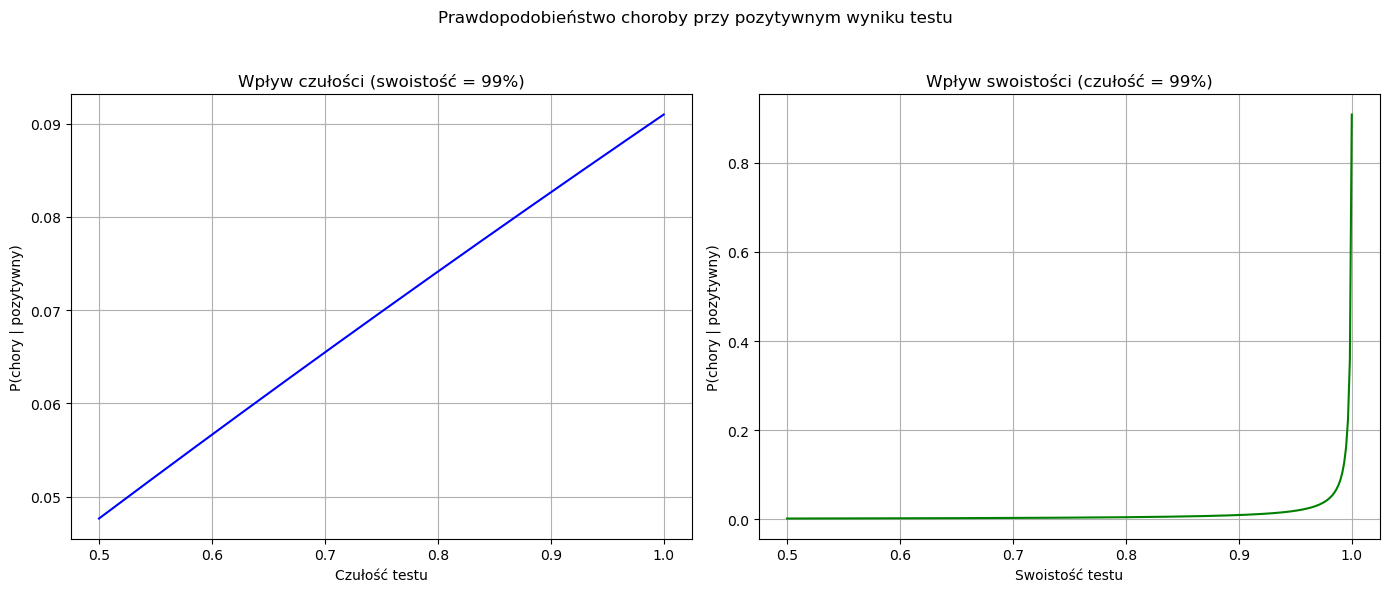

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_A = 700 / 700_000
specificity_fixed = 0.99
sensitivity_fixed = 0.99

# Zakresy
sensitivity_range = np.linspace(0.5, 0.9999, 300)
specificity_range = np.linspace(0.5, 0.9999, 300)

posterior_sens = []
for sens in sensitivity_range:
    p_B = sens * p_A + (1 - specificity_fixed) * (1 - p_A)
    posterior_sens.append(bayesian_probability(p_A, p_B, sens))

posterior_spec = []
for spec in specificity_range:
    p_B = sensitivity_fixed * p_A + (1 - spec) * (1 - p_A)
    posterior_spec.append(bayesian_probability(p_A, p_B, sensitivity_fixed))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Wpływ czułości
ax[0].plot(sensitivity_range, posterior_sens, color='blue')
ax[0].set_title('Wpływ czułości (swoistość = 99%)')
ax[0].set_xlabel('Czułość testu')
ax[0].set_ylabel('P(chory | pozytywny)')
ax[0].grid(True)

ax[1].plot(specificity_range, posterior_spec, color='green')
ax[1].set_title('Wpływ swoistości (czułość = 99%)')
ax[1].set_xlabel('Swoistość testu')
ax[1].set_ylabel('P(chory | pozytywny)')
ax[1].grid(True)

plt.suptitle('Prawdopodobieństwo choroby przy pozytywnym wyniku testu')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Zadanie 2

Sprawdź (symulacją) ile średnio razy należy losować 13 kart, aby trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze. Możemy to zrobić następująco: losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w którymkolwiek kolorze dostaniemy $\ge 8$ kart, zapisujemy liczbę przeprowadzonych losowań i podejmujemy kolejną próbę. Przeprowadź 1000 takich prób i oblicz średnią liczbę losowań. 

Dodatkowo wypisz jedną (np. ostatnią) wylosowaną "rękę".